![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [50]:
library(tidyverse)
library(gridExtra)

In [51]:
#Exploratory data analysis
woman = read_csv('women_results.csv')
man = read_csv('men_results.csv')
summary(woman)
str(woman)
summary(man)
str(man)
unique(woman$tournament)
unique(man$tournament)
unique(woman$home_team)



New names:
• `` -> `...1`
Rows: 4884 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 44353 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): home_team, away_team, tournament
dbl  (3): ...1, home_score, away_score
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


      ...1           date             home_team          away_team        
 Min.   :   0   Min.   :1969-11-01   Length:4884        Length:4884       
 1st Qu.:1221   1st Qu.:2000-06-23   Class :character   Class :character  
 Median :2442   Median :2009-07-13   Mode  :character   Mode  :character  
 Mean   :2442   Mean   :2007-08-17                                        
 3rd Qu.:3662   3rd Qu.:2016-04-12                                        
 Max.   :4883   Max.   :2022-07-31                                        
   home_score       away_score      tournament       
 Min.   : 0.000   Min.   : 0.000   Length:4884       
 1st Qu.: 0.000   1st Qu.: 0.000   Class :character  
 Median : 1.000   Median : 1.000   Mode  :character  
 Mean   : 2.273   Mean   : 1.431                     
 3rd Qu.: 3.000   3rd Qu.: 2.000                     
 Max.   :24.000   Max.   :24.000                     

spc_tbl_ [4,884 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:4884] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:4884], format: "1969-11-01" "1969-11-01" ...
 $ home_team : chr [1:4884] "Italy" "Denmark" "England" "Italy" ...
 $ away_team : chr [1:4884] "France" "England" "France" "Denmark" ...
 $ home_score: num [1:4884] 1 4 2 3 3 0 3 3 3 0 ...
 $ away_score: num [1:4884] 0 3 0 1 2 2 0 0 0 2 ...
 $ tournament: chr [1:4884] "Euro" "Euro" "Euro" "Euro" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


      ...1            date             home_team          away_team        
 Min.   :    0   Min.   :1872-11-30   Length:44353       Length:44353      
 1st Qu.:11088   1st Qu.:1979-05-13   Class :character   Class :character  
 Median :22176   Median :1999-03-11   Mode  :character   Mode  :character  
 Mean   :22176   Mean   :1992-06-23                                        
 3rd Qu.:33264   3rd Qu.:2011-03-25                                        
 Max.   :44352   Max.   :2022-12-18                                        
   home_score       away_score      tournament       
 Min.   : 0.000   Min.   : 0.000   Length:44353      
 1st Qu.: 1.000   1st Qu.: 0.000   Class :character  
 Median : 1.000   Median : 1.000   Mode  :character  
 Mean   : 1.741   Mean   : 1.179                     
 3rd Qu.: 2.000   3rd Qu.: 2.000                     
 Max.   :31.000   Max.   :21.000                     

spc_tbl_ [44,353 × 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1      : num [1:44353] 0 1 2 3 4 5 6 7 8 9 ...
 $ date      : Date[1:44353], format: "1872-11-30" "1873-03-08" ...
 $ home_team : chr [1:44353] "Scotland" "England" "Scotland" "England" ...
 $ away_team : chr [1:44353] "England" "Scotland" "England" "Scotland" ...
 $ home_score: num [1:44353] 0 4 2 2 3 4 1 0 7 9 ...
 $ away_score: num [1:44353] 0 2 1 2 0 0 3 2 2 0 ...
 $ tournament: chr [1:44353] "Friendly" "Friendly" "Friendly" "Friendly" ...
 - attr(*, "spec")=
  .. cols(
  ..   ...1 = col_double(),
  ..   date = col_date(format = ""),
  ..   home_team = col_character(),
  ..   away_team = col_character(),
  ..   home_score = col_double(),
  ..   away_score = col_double(),
  ..   tournament = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


[1] "Euro"                                
 [2] "AFC Championship"                    
 [3] "UEFA Euro qualification"             
 [4] "OFC Championship"                    
 [5] "UEFA Euro"                           
 [6] "African Championship"                
 [7] "CONCACAF Championship"               
 [8] "Copa América"                        
 [9] "FIFA World Cup"                      
[10] "CONCACAF Invitational Tournament"    
[11] "Algarve Cup"                         
[12] "Olympic Games"                       
[13] "Four Nations Tournament"             
[14] "African Championship qualification"  
[15] "CONCACAF Gold Cup qualification"     
[16] "CONCACAF Gold Cup"                   
[17] "AFC Asian Cup qualification"         
[18] "AFC Asian Cup"                       
[19] "Cyprus Cup"                          
[20] "Olympic Games qualification"         
[21] "Friendly"                            
[22] "SheBelieves Cup"                     
[23] "FIFA World Cup qualification"        
[24] "Tournament of Nations"               
[25] "OFC Nations Cup qualification"       
[26] "African Cup of Nations"              
[27] "OFC Nations Cup"                     
[28] "Tournoi de France"                   
[29] "Basque Country Women's Cup"          
[30] "African Cup of Nations qualification"

[1] "Friendly"                                     
  [2] "British Home Championship"                    
  [3] "Évence Coppée Trophy"                         
  [4] "Copa Lipton"                                  
  [5] "Copa Newton"                                  
  [6] "Copa Premio Honor Argentino"                  
  [7] "Copa Premio Honor Uruguayo"                   
  [8] "Copa Roca"                                    
  [9] "Copa América"                                 
 [10] "Copa Chevallier Boutell"                      
 [11] "Nordic Championship"                          
 [12] "Central European International Cup"           
 [13] "Baltic Cup"                                   
 [14] "Balkan Cup"                                   
 [15] "FIFA World Cup"                               
 [16] "Copa Rio Branco"                              
 [17] "FIFA World Cup qualification"                 
 [18] "Bolivarian Games"                             
 [19] "CCCF Championship"                            
 [20] "NAFC Championship"                            
 [21] "Copa Oswaldo Cruz"                            
 [22] "Pan American Championship"                    
 [23] "Copa del Pacífico"                            
 [24] "Copa Bernardo O'Higgins"                      
 [25] "AFC Asian Cup qualification"                  
 [26] "Atlantic Cup"                                 
 [27] "AFC Asian Cup"                                
 [28] "African Cup of Nations"                       
 [29] "Copa Paz del Chaco"                           
 [30] "Merdeka Tournament"                           
 [31] "UEFA Euro qualification"                      
 [32] "UEFA Euro"                                    
 [33] "Windward Islands Tournament"                  
 [34] "African Cup of Nations qualification"         
 [35] "Vietnam Independence Cup"                     
 [36] "Copa Carlos Dittborn"                         
 [37] "Phillip Seaga Cup"                            
 [38] "CONCACAF Championship"                        
 [39] "Copa Juan Pinto Durán"                        
 [40] "Arab Cup"                                     
 [41] "South Pacific Games"                          
 [42] "CONCACAF Championship qualification"          
 [43] "Copa Artigas"                                 
 [44] "GaNEFo"                                       
 [45] "King's Cup"                                   
 [46] "Gulf Cup"                                     
 [47] "Indonesia Tournament"                         
 [48] "Korea Cup"                                    
 [49] "Palestine Cup"                                
 [50] "Brazil Independence Cup"                      
 [51] "Copa Ramón Castilla"                          
 [52] "Oceania Nations Cup"                          
 [53] "CECAFA Cup"                                   
 [54] "Kuneitra Cup"                                 
 [55] "Copa Félix Bogado"                            
 [56] "Real Madrid 75th Anniversary Cup"             
 [57] "Beijing International Friendship Tournament"  
 [58] "Kirin Cup"                                    
 [59] "CFU Caribbean Cup qualification"              
 [60] "CFU Caribbean Cup"                            
 [61] "Amílcar Cabral Cup"                           
 [62] "FIFA 75th Anniversary Cup"                    
 [63] "Guangzhou International Friendship Tournament"
 [64] "Mundialito"                                   
 [65] "West African Cup"                             
 [66] "Nehru Cup"                                    
 [67] "Merlion Cup"                                  
 [68] "Great Wall Cup"                               
 [69] "UDEAC Cup"                                    
 [70] "Rous Cup"                                     
 [71] "CONMEBOL–UEFA Cup of Champions"               
 [72] "Lunar New Year Cup"                           
 [73] "Arab Cup qualification"                       
 [74] "Tournoi de France"                            
 [75] 

[1] "Italy"                            "Denmark"                         
  [3] "England"                          "Thailand"                        
  [5] "Hong Kong"                        "New Zealand"                     
  [7] "Australia"                        "Taiwan"                          
  [9] "Indonesia"                        "Singapore"                       
 [11] "Sweden"                           "Northern Ireland"                
 [13] "France"                           "Switzerland"                     
 [15] "Wales"                            "India S"                         
 [17] "India N"                          "Western Australia"               
 [19] "India"                            "Japan"                           
 [21] "Finland"                          "Norway"                          
 [23] "Iceland"                          "Scotland"                        
 [25] "Belgium"                          "Netherlands"                     
 [27] "Republic of Ireland"              "Portugal"                        
 [29] "Germany"                          "Malaysia"                        
 [31] "Philippines"                      "New Caledonia"                   
 [33] "Hungary"                          "Spain"                           
 [35] "China PR"                         "Bulgaria"                        
 [37] "Czechoslovakia"                   "Poland"                          
 [39] "North Korea"                      "Nigeria"                         
 [41] "Ghana"                            "Canada"                          
 [43] "Haiti"                            "United States"                   
 [45] "Martinique"                       "Trinidad and Tobago"             
 [47] "Jamaica"                          "Brazil"                          
 [49] "Chile"                            "Guinea"                          
 [51] "Papua New Guinea"                 "Cameroon"                        
 [53] "Russia"                           "Greece"                          
 [55] "Romania"                          "Yugoslavia"                      
 [57] "Lithuania"                        "Ukraine"                         
 [59] "Latvia"                           "Slovenia"                        
 [61] "Slovakia"                         "Croatia"                         
 [63] "Czech Republic"                   "Mexico"                          
 [65] "South Africa"                     "Sierra Leone"                    
 [67] "Zambia"                           "Argentina"                       
 [69] "Ecuador"                          "Angola"                          
 [71] "Austria"                          "Uzbekistan"                      
 [73] "Faroe Islands"                    "South Korea"                     
 [75] "Kazakhstan"                       "FR Yugoslavia"                   
 [77] "Belarus"                          "Estonia"                         
 [79] "Turkey"                           "Paraguay"                        
 [81] "Colombia"                         "Uruguay"                         
 [83] "Venezuela"                        "Bolivia"                         
 [85] "Peru"                             "Mozambique"                      
 [87] "Egypt"                            "Uganda"                          
 [89] "Eswatini"                         "Lesotho"                         
 [91] "Guatemala"                        "El Salvador"                     
 [93] "Costa Rica"                       "Puerto Rico"                     
 [95] "Fiji"                             "DR Congo"                        
 [97] "Morocco"                          "Honduras"                        
 [99] "Nicaragua"                        "Bosnia and Herzegovina"          
[101] "Israel"                           "Vietnam"                         
[103] "Guam"                             "Gabon"                           
[105] "Réunion"                          "Zimbabwe

In [52]:
#Filtering the data and Calculating the test values
library(dplyr)
man_FIFA = man %>% filter(tournament == 'FIFA World Cup' & date > '2002-01-01') %>% mutate(goal = home_score+away_score)
woman_FIFA = woman %>% filter(tournament == 'FIFA World Cup' & date > '2002-01-01') %>% mutate(goal = home_score+away_score)
summary(man_FIFA)
summary(woman_FIFA)

      ...1            date             home_team          away_team        
 Min.   :25164   Min.   :2002-05-31   Length:384         Length:384        
 1st Qu.:28770   1st Qu.:2006-06-19   Class :character   Class :character  
 Median :34557   Median :2012-06-26   Mode  :character   Mode  :character  
 Mean   :34630   Mean   :2012-07-16                                        
 3rd Qu.:40385   3rd Qu.:2018-06-24                                        
 Max.   :44352   Max.   :2022-12-18                                        
   home_score      away_score     tournament             goal      
 Min.   :0.000   Min.   :0.000   Length:384         Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   Class :character   1st Qu.:1.000  
 Median :1.000   Median :1.000   Mode  :character   Median :2.000  
 Mean   :1.375   Mean   :1.138                      Mean   :2.513  
 3rd Qu.:2.000   3rd Qu.:2.000                      3rd Qu.:3.000  
 Max.   :8.000   Max.   :7.000                      Max.   :

      ...1           date             home_team          away_team        
 Min.   :1600   Min.   :2003-09-20   Length:200         Length:200        
 1st Qu.:2156   1st Qu.:2007-09-17   Class :character   Class :character  
 Median :3430   Median :2015-06-07   Mode  :character   Mode  :character  
 Mean   :3094   Mean   :2012-10-01                                        
 3rd Qu.:4418   3rd Qu.:2019-06-08                                        
 Max.   :4469   Max.   :2019-07-07                                        
   home_score       away_score     tournament             goal      
 Min.   : 0.000   Min.   :0.000   Length:200         Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.:0.000   Class :character   1st Qu.: 2.00  
 Median : 1.000   Median :1.000   Mode  :character   Median : 3.00  
 Mean   : 1.805   Mean   :1.175                      Mean   : 2.98  
 3rd Qu.: 2.000   3rd Qu.:2.000                      3rd Qu.: 4.00  
 Max.   :13.000   Max.   :7.000                      Max.   :

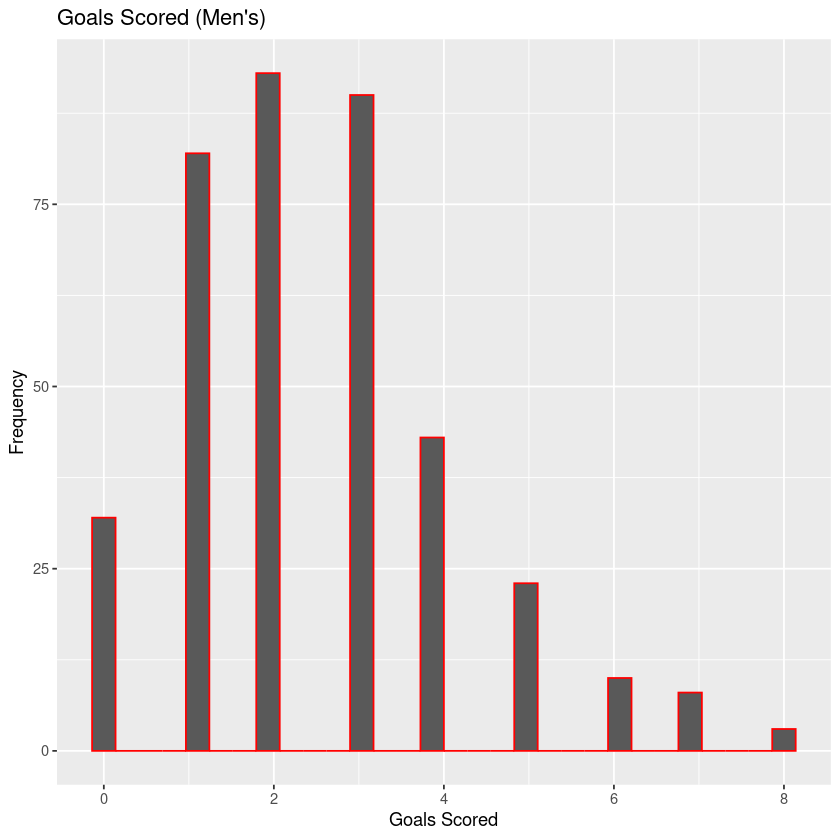

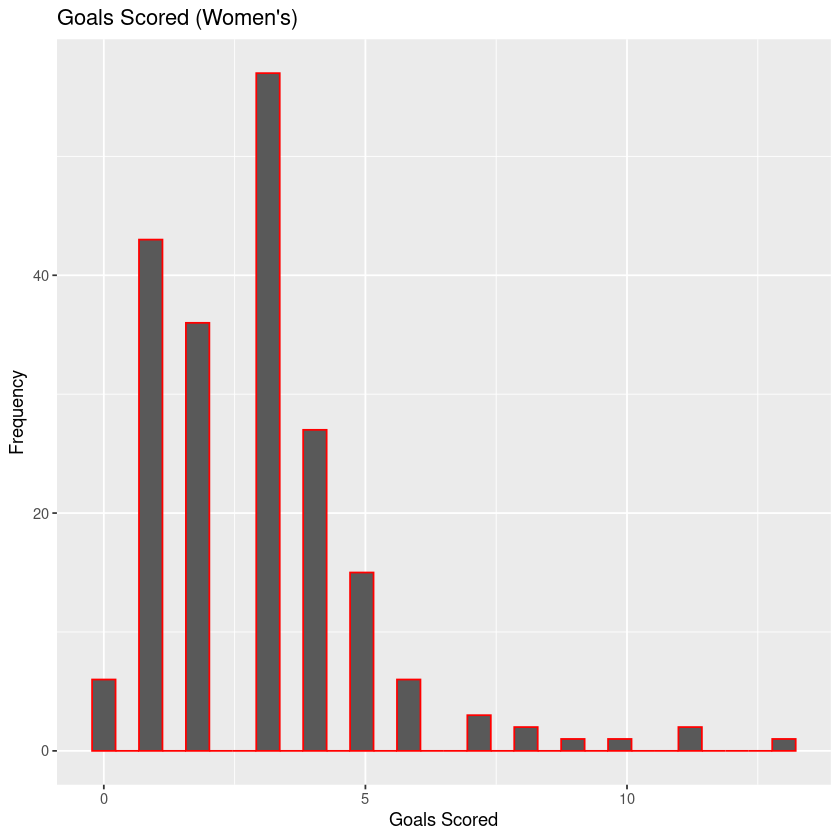

In [53]:
# Choosing the correct hypothesis test
#Because there are two independent groups, men's and women's, this scenario requires an unpaired two-sample test.An unpaired t-test and a Wilcoxon-Mann-Whitney test are the two most commmon two-sample tests, where the Wilcoxon-Mann-Whitney test is a non-parametric version of the unpaired t-test.To determine if a parametric or non-parametric test is appropriate, need to verify the underlying assumptions of parametric tests, including checking the sample size in each group and the normality of each distribution.
man_plot = ggplot(man_FIFA, aes(x = goal)) +
  geom_histogram(color = "red", bins = 30) +
  ggtitle("Goals Scored (Men's)") +
  xlab("Goals Scored") +
  ylab("Frequency")
woman_plot = ggplot(woman_FIFA,aes(goal)) + geom_histogram(color='Red',bins=30) +
ggtitle("Goals Scored (Women's)") + xlab("Goals Scored") + ylab("Frequency")

man_plot
woman_plot




	Wilcoxon rank sum test with continuity correction

data:  woman_FIFA$goal and man_FIFA$goal
W = 43273, p-value = 0.005107
alternative hypothesis: true location shift is greater than 0


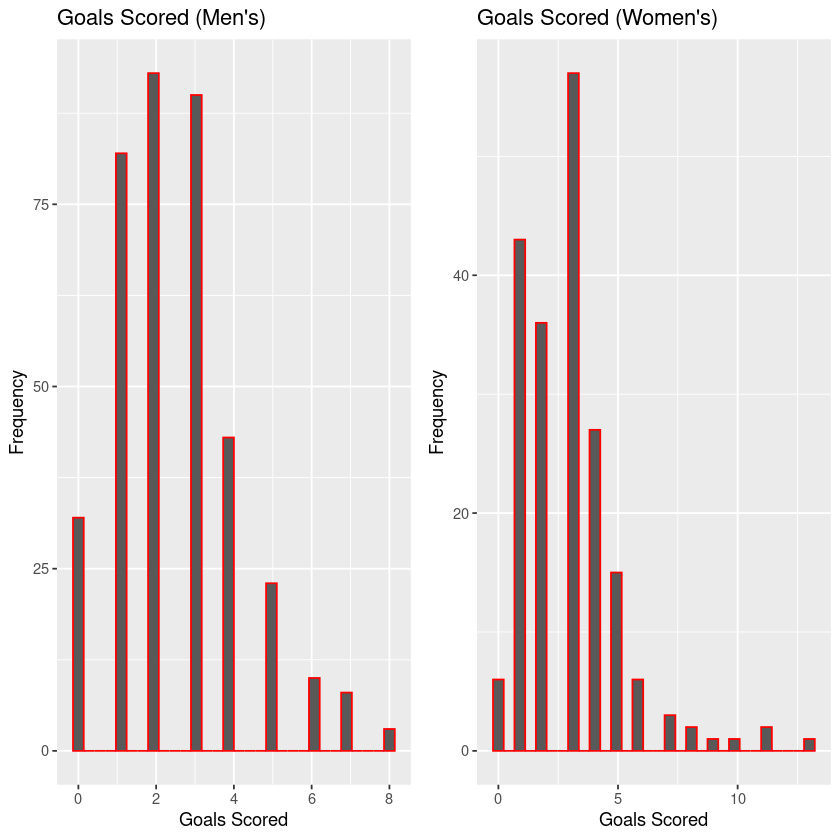

In [57]:
grid.arrange(man_plot,woman_plot,nrow=1)

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
result = wilcox.test(x=woman_FIFA$goal,y=man_FIFA$goal,alternative='greater') # x is greater than y
result

p_value = round(result$p.value,4)
result = ifelse(p_value <= 0.01,'reject','fail to reject')
result_df = data.frame(p_value,result) 